1.1 Задание № 1
Напишите функциидля генерации случайных величин имеющих следующие
распределения:
1. Бернулли с параметром p;
2. Биномиальное с параметрами n, p;
3. Геометрическое с параметром p;
4. Пуассона с параметром λ;
5. Равномерное на отрезке [a; b];
6. Показательное с параметром α;
7. Лапласа с параметром α;
8. Нормальное с параметрами a и σ2 (если Y — стандартное нормальное
распределение, то в этом пункте речь идёт о σY + a);
9. Распределения Коши;
10. Распределения, заданного ядром $
f(t) = \frac{1}{t^3}I_{t > 1}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, geom, poisson, uniform, expon, laplace, cauchy, gamma, beta

In [ ]:
def generate_bernoulli(p, size = 1): #discret
    u = np.random.uniform(0, 1, size)
    return(u < p).astype(int)

def generate_binominal(n, p, size = 1): #discret
    return np.sum(generate_bernoulli(p, size = (size, n)), axis=1)

def generate_geometric(p, size = 1): #discret
    u = np.random.uniform(0, 1, size)
    return np.ceil(np.log(1 - u) / np.log(1 - p))

def generate_poisson(lam, size = 1): #discret
    return np.random.poisson(lam, size)

def generate_uniform(a, b, size = 1):
    u = np.random.uniform(0, 1, size)
    return a + (b - a) * u

def generate_exponential(alpha, size = 1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / alpha

def generate_laplace(alpha, size = 1):
    u = np.random.uniform(0, 1, size)
    sign = np.sign(u - 0.5)
    return sign * generate_exponential(alpha, size)

def generate_normal(mu, sigma2, size = 1):
    return np.random.normal(mu, np.sqrt(sigma2), size)

def generate_koshi(size = 1):
    u = np.random.uniform(0, 1, size)
    return np.tan(np.pi * (u - 0.5))

def generate_custom(size = 1):
    u = np.random.uniform(0, 1, size)
    return 1 / np.sqrt(1 - u)


In [12]:
generate_binominal(10, 0.5, 5)

array([4, 2, 5, 5, 4])

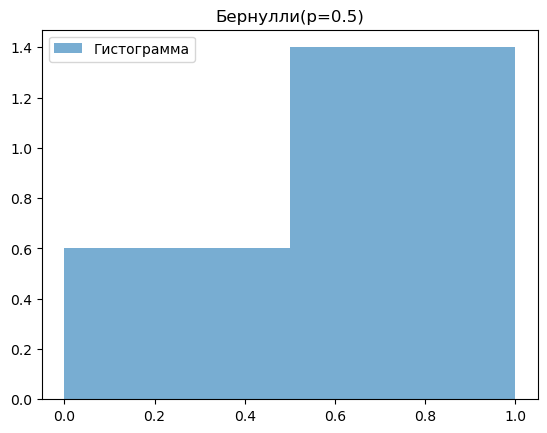

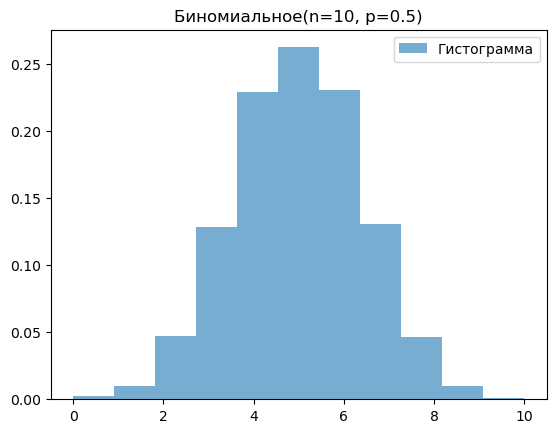

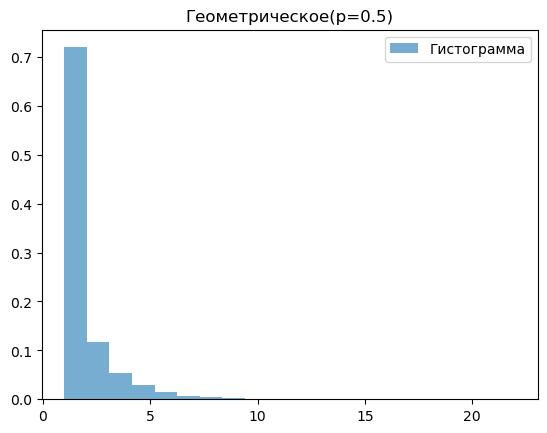

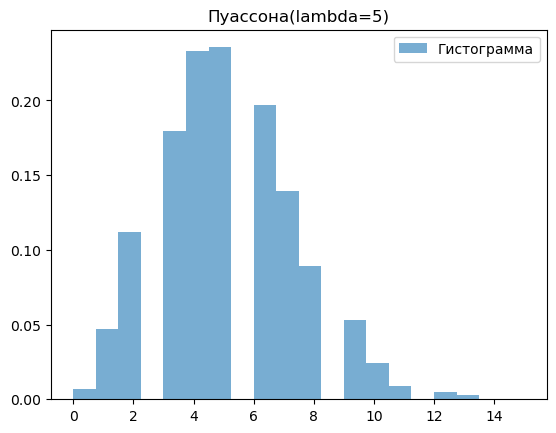

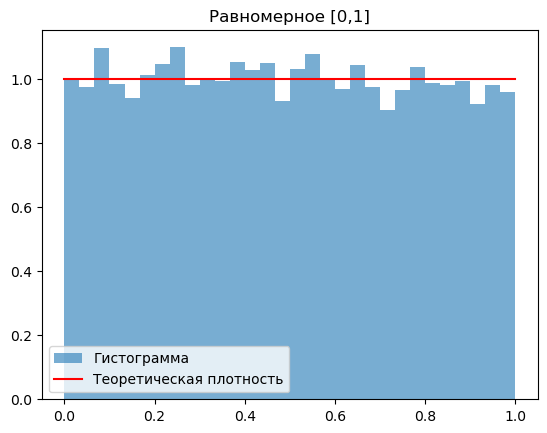

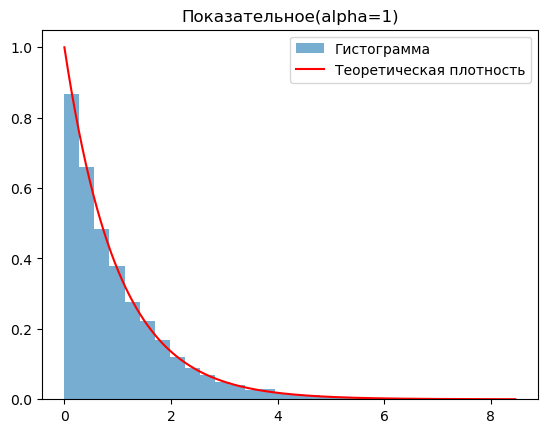

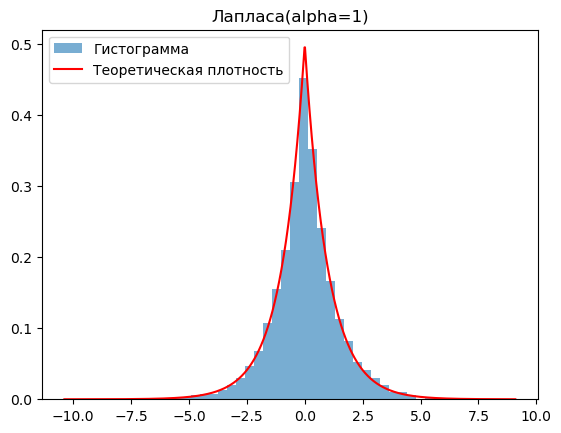

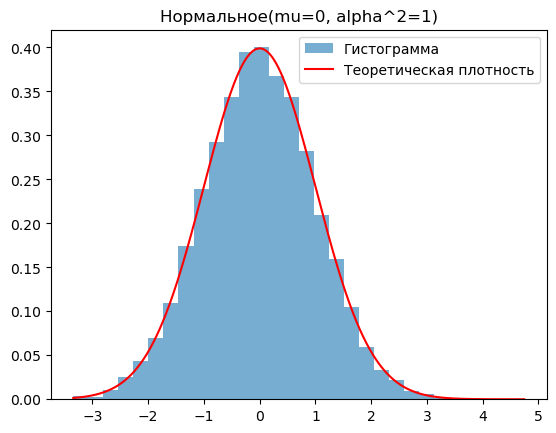

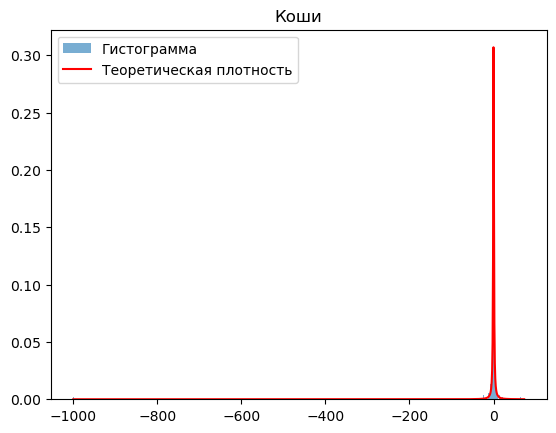

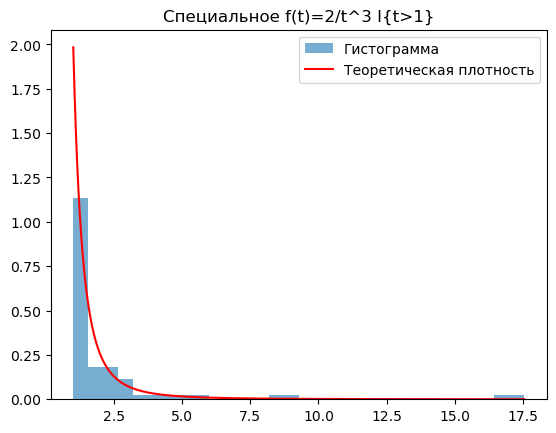

In [3]:
def plot_distribution(generate_func, params, title, bins=30, is_discrete=False, theoretical=None, size=10000):
    data = generate_func(*params, size=size)
    plt.hist(data, bins=bins, density=True, alpha=0.6, label='Гистограмма')
    if theoretical:
        x = np.linspace(min(data), max(data), 1000)
        plt.plot(x, theoretical(x), 'r-', label='Теоретическая плотность')
    plt.title(title)
    plt.legend()
    plt.show()


plot_distribution(generate_bernoulli, (0.5,), 'Бернулли(p=0.5)', bins=2, is_discrete=True, size= 10)
plot_distribution(generate_binominal, (10, 0.5), 'Биномиальное(n=10, p=0.5)', bins=11, is_discrete=True, size=10000)
plot_distribution(generate_geometric, (0.5,), 'Геометрическое(p=0.5)', bins=20, is_discrete=True)
plot_distribution(generate_poisson, (5,), 'Пуассона(lambda=5)', bins=20, is_discrete=True)
plot_distribution(generate_uniform, (0, 1), 'Равномерное [0,1]', bins=30, theoretical=lambda x: uniform.pdf(x, 0, 1))
plot_distribution(generate_exponential, (1,), 'Показательное(alpha=1)', bins=30, theoretical=lambda x: expon.pdf(x, scale=1))
plot_distribution(generate_laplace, (1,), 'Лапласа(alpha=1)', bins=50, theoretical=lambda x: laplace.pdf(x, scale=1), size=10000)
plot_distribution(generate_normal, (0, 1), 'Нормальное(mu=0, alpha^2=1)', bins=30, theoretical=lambda x: norm.pdf(x), size= 10000)
plot_distribution(generate_koshi, (), 'Коши', bins=1000, theoretical=lambda x: cauchy.pdf(x), size= 500)
plot_distribution(generate_custom, (), 'Специальное f(t)=2/t^3 I{t>1}', bins=30, theoretical=lambda x: (x > 1) * 2 / x**3, size = 80)

In [4]:
def estimate_params(data):
    # выборочное среднее
    mean = np.mean(data)
    #выборочная дисперсия
    var = np.var(data, ddof=1)
    # выборочный коэф ассиметрии
    skewness = ((data - mean)**3).mean() / var**1.5
    #выборочный эксцесс
    kurtosis = ((data - mean)**4).mean() / var**2 - 3
    return mean, var, skewness, kurtosis

# Примеры для распределений
data = generate_binominal(10, 0.5, size=10000)
mean, var, skew, kurt = estimate_params(data)
print(f"Binomial: mean={mean}, var={var}, skew={skew}, kurt={kurt}")

# Для гамма и бета
data_gamma = gamma.rvs(a=2, scale=1, size=10000)
mean, var, skew, kurt = estimate_params(data_gamma)
print(f"Gamma: mean={mean}, var={var}, skew={skew}, kurt={kurt}")

data_beta = beta.rvs(a=2, b=5, size=10000)
mean, var, skew, kurt = estimate_params(data_beta)
print(f"Beta: mean={mean}, var={var}, skew={skew}, kurt={kurt}")

Binomial: mean=5.0031, var=2.4761380038003793, skew=-0.00711577128690271, kurt=-0.21132317424814007
Gamma: mean=2.0049885976705553, var=2.041404317073441, skew=1.3797935039399318, kurt=2.8444894940998022
Beta: mean=0.2869845026893573, var=0.025459324184558506, skew=0.5744738595222625, kurt=-0.16540449511432698


In [11]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def clt_demo(generate_func, params, n_samples, N=10000, mu=None, sigma2=None, title=None):
    sums = np.zeros(N)
    
    for i in range(N):
        data = generate_func(*params, size=n_samples)
        total = data.sum()
        
        # --- Используем ТЕОРЕТИЧЕСКИЕ параметры ---
        if mu is None or sigma2 is None:
            # Автоопределение по типу функции
            if generate_func == generate_bernoulli:
                p = params[0]
                mu, sigma2 = p, p*(1-p)
            elif generate_func == generate_binominal:
                n, p = params
                mu, sigma2 = n*p, n*p*(1-p)
            elif generate_func == generate_geometric:
                p = params[0]
                mu, sigma2 = 1/p, (1-p)/p**2
            elif generate_func == generate_poisson:
                lam = params[0]
                mu, sigma2 = lam, lam
            elif generate_func == generate_uniform:
                a, b = params
                mu, sigma2 = (a+b)/2, (b-a)**2 / 12
            elif generate_func == generate_exponential:
                alpha = params[0]
                mu, sigma2 = 1/alpha, 1/alpha**2
            elif generate_func == generate_laplace:
                alpha = params[0]
                mu, sigma2 = 0, 2/alpha**2
            elif generate_func == generate_normal:
                mu, sigma2 = params
            elif generate_func == generate_koshi:

                print("Коши — ЦПТ не применима!")
                return
            else:
                mu, sigma2 = np.mean(data), np.var(data)
        
        sums[i] = (total - n_samples * mu) / np.sqrt(n_samples * sigma2)
    
    # --- График ---
    plt.figure(figsize=(10, 6))
    plt.hist(sums, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Гистограмма')
    x = np.linspace(-4, 4, 200)
    plt.plot(x, norm.pdf(x), 'r-', lw=2, label='N(0,1)')
    plt.xlim(-4, 4)
    plt.ylim(0, 0.5)
    plt.title(title or f'ЦПТ: {generate_func.__name__}, n = {n_samples}')
    plt.xlabel('Стандартизованная сумма')
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

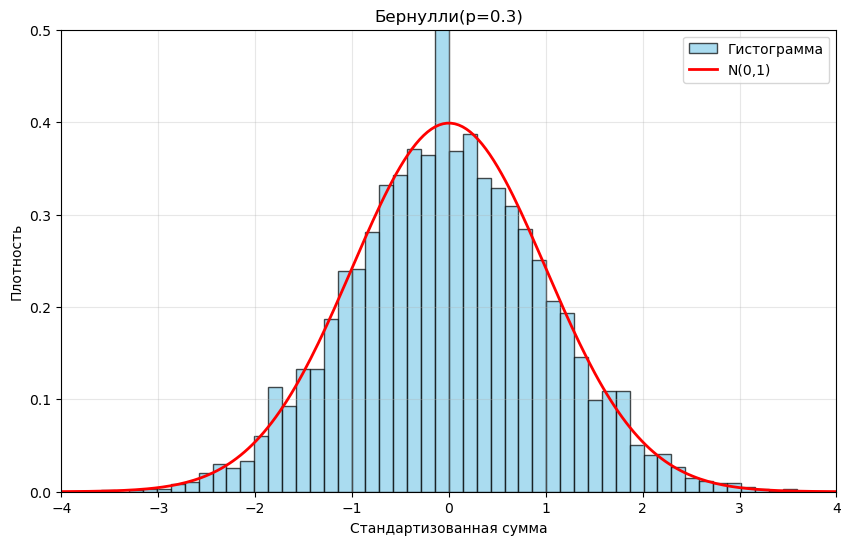

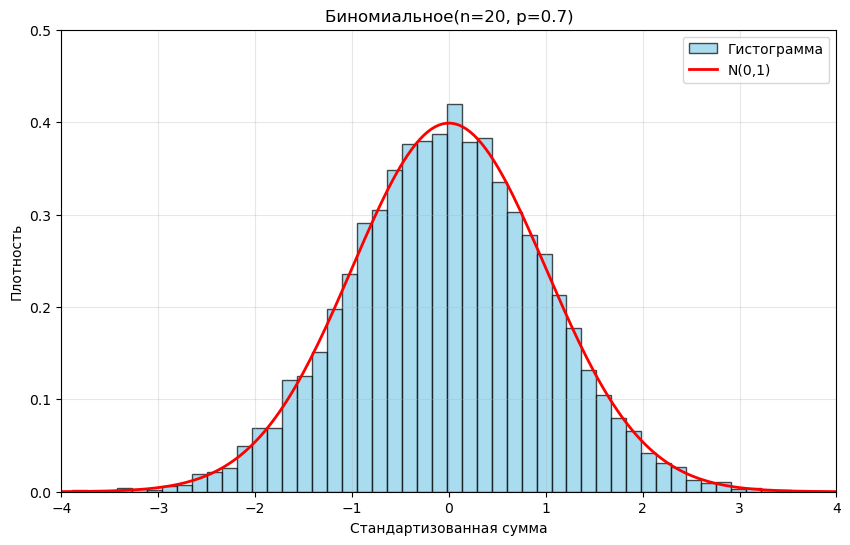

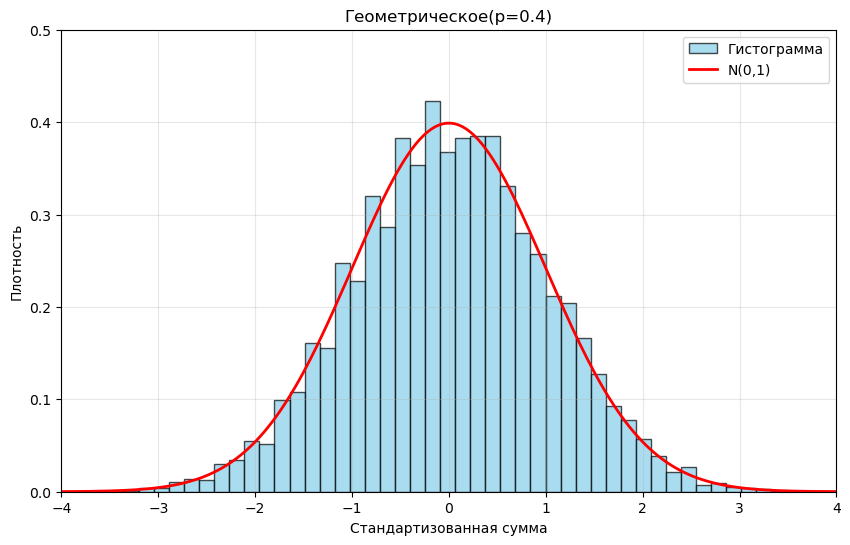

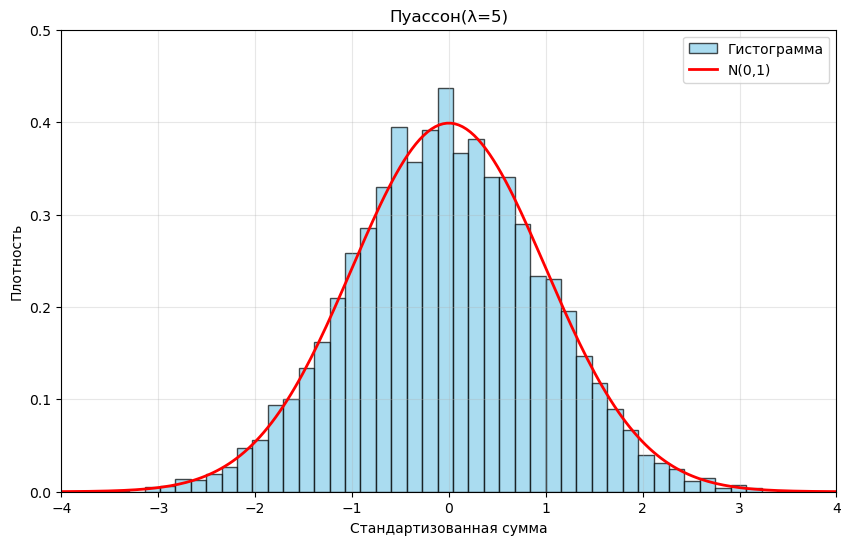

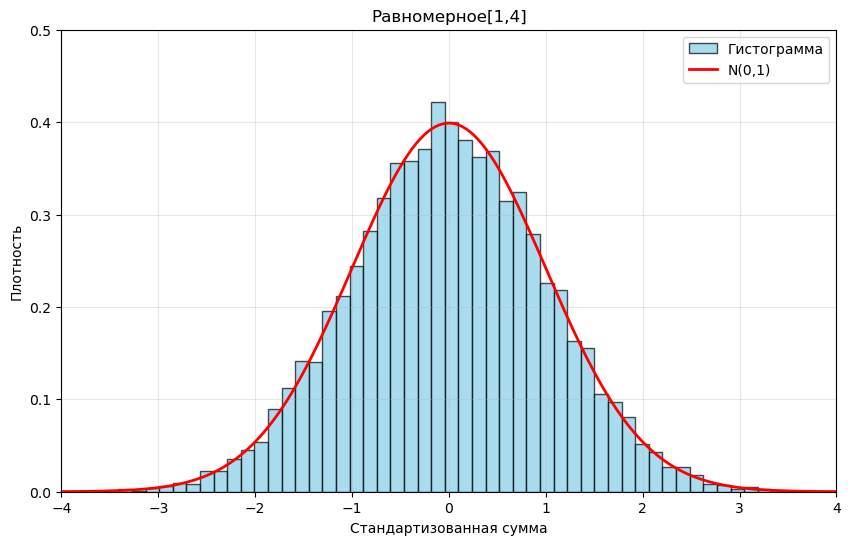

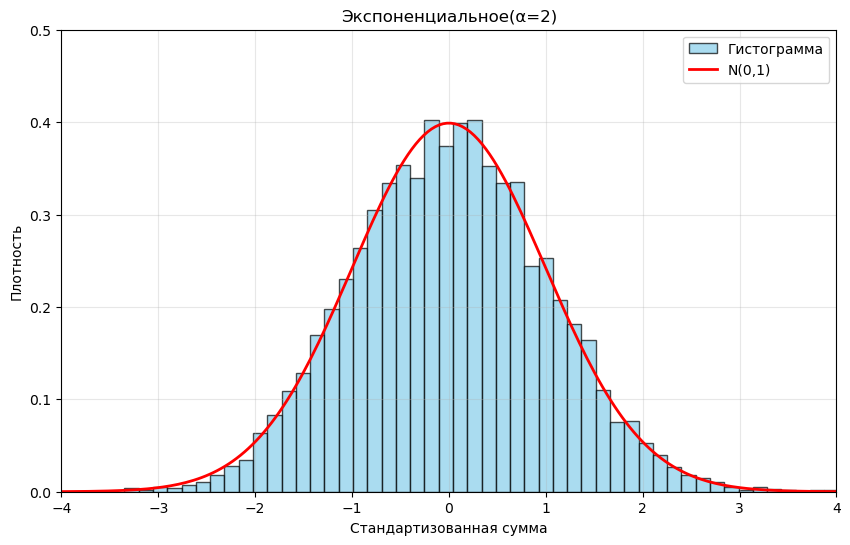

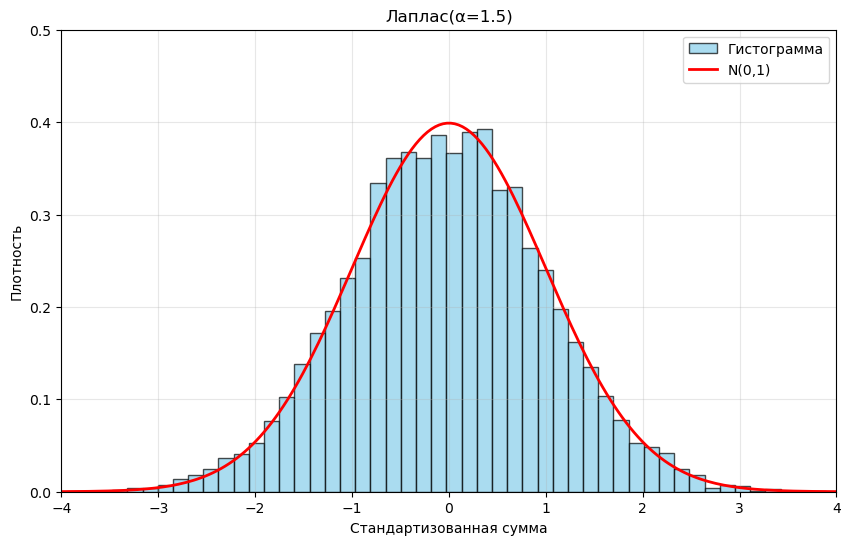

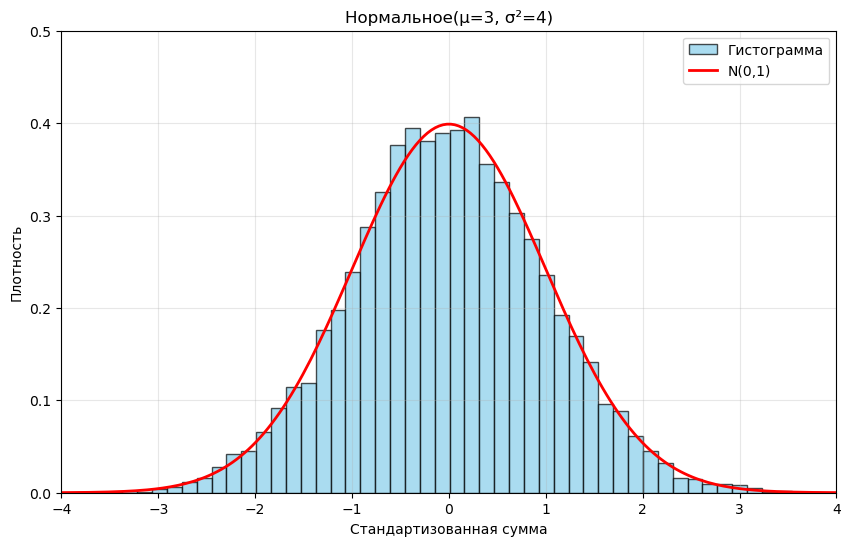

Внимание: Коши — ЦПТ не применима!


In [10]:
# 1. Бернулли
clt_demo(generate_bernoulli, (0.3,), 1000, title="Бернулли(p=0.3)")

# 2. Биномиальное
clt_demo(generate_binominal, (20, 0.7), 1000, title="Биномиальное(n=20, p=0.7)")

# 3. Геометрическое
clt_demo(generate_geometric, (0.4,), 1000, title="Геометрическое(p=0.4)")

# 4. Пуассон
clt_demo(generate_poisson, (5,), 1000, title="Пуассон(λ=5)")

# 5. Равномерное
clt_demo(generate_uniform, (1, 4), 1000, title="Равномерное[1,4]")

# 6. Экспоненциальное
clt_demo(generate_exponential, (2,), 1000, title="Экспоненциальное(α=2)")

# 7. Лаплас
clt_demo(generate_laplace, (1.5,), 1000, title="Лаплас(α=1.5)")

# 8. Нормальное
clt_demo(generate_normal, (3, 4), 1000, title="Нормальное(μ=3, σ²=4)")

# 9. Коши — НЕ РАБОТАЕТ!
clt_demo(generate_koshi, (), 1000, title="Коши — ЦПТ не применима!")